Loading BERT-Tiny from prajjwal1/bert-tiny ...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading BERT-Mini from prajjwal1/bert-mini ...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-mini and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading BERT-Small from prajjwal1/bert-small ...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-small and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading DistilBERT from distilbert-base-uncased ...
Parameter counts (millions):
BERT-Tiny: 4.39M
BERT-Mini: 11.17M
BERT-Small: 28.77M
DistilBERT: 66.96M


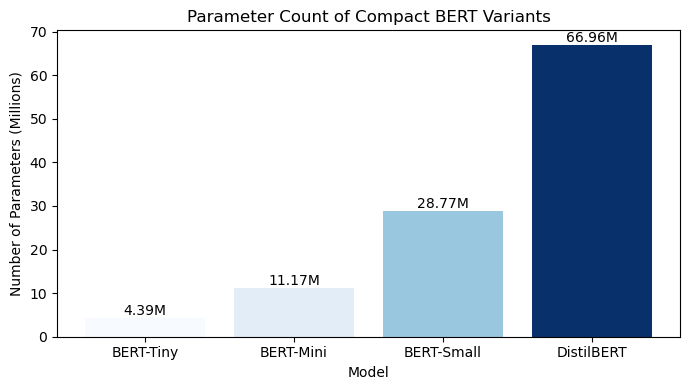

In [10]:
# Figure 1: parameter count comparison for all the models

from transformers import AutoModelForSequenceClassification
import matplotlib.pyplot as plt

model_checkpoints = {
    "BERT-Tiny": "prajjwal1/bert-tiny",
    "BERT-Mini": "prajjwal1/bert-mini",
    "BERT-Small": "prajjwal1/bert-small",
    "DistilBERT": "distilbert-base-uncased",
}

param_counts_millions = {}

for model_name, checkpoint in model_checkpoints.items():
    print(f"Loading {model_name} from {checkpoint} ...")
    model = AutoModelForSequenceClassification.from_pretrained(
        checkpoint,
        num_labels=6  # 6 categories in emotion dataset
    )
    total_params = sum(p.numel() for p in model.parameters())
    param_counts_millions[model_name] = total_params / 1e6  # 转成百万参数

print("Parameter counts (millions):")
for name, count in param_counts_millions.items():
    print(f"{name}: {count:.2f}M")

model_names = list(param_counts_millions.keys())
counts = [param_counts_millions[name] for name in model_names]

from matplotlib import cm
from matplotlib.colors import Normalize

model_names = list(param_counts_millions.keys())
counts = [param_counts_millions[m] for m in model_names]

norm = Normalize(vmin=min(counts), vmax=max(counts))
colors = cm.Blues(norm(counts))  

plt.figure(figsize=(7, 4))
bars = plt.bar(model_names, counts, color=colors)

for bar, value in zip(bars, counts):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{value:.2f}M",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.ylabel("Number of Parameters (Millions)")
plt.xlabel("Model")
plt.title("Parameter Count of Compact BERT Variants")
plt.tight_layout()
plt.savefig("figure_model_parameters_gradient.png", dpi=300)
plt.show()

Label counts in training split:
sadness: 4666
anger: 2159
love: 1304
surprise: 572
fear: 1937
joy: 5362


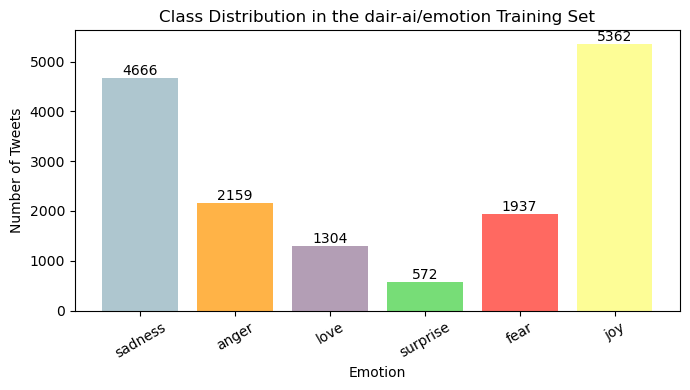

In [12]:
# Figure 2: emotion label distribution in the training set

from datasets import load_dataset
from collections import Counter
import matplotlib.pyplot as plt

emotion_dataset = load_dataset("dair-ai/emotion")
train_split = emotion_dataset["train"]

label_feature = train_split.features["label"]
id2label = label_feature.int2str

train_labels = train_split["label"]
train_label_names = [id2label(i) for i in train_labels]

label_counts = Counter(train_label_names)

emotion_names = list(label_counts.keys())
counts = [label_counts[name] for name in emotion_names]

print("Label counts in training split:")
for name in emotion_names:
    print(f"{name}: {label_counts[name]}")

pastel_colors = [
    "#AEC6CF",  
    "#FFB347",   
    "#B39EB5",   
    "#77DD77",   
    "#FF6961",   
    "#FDFD96",  
]

plt.figure(figsize=(7, 4))
bars = plt.bar(emotion_names, counts, color=pastel_colors)

for bar, value in zip(bars, counts):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        str(value),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.ylabel("Number of Tweets")
plt.xlabel("Emotion")
plt.title("Class Distribution in the dair-ai/emotion Training Set")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("figure_emotion_distribution.png", dpi=300)
plt.show()